# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-xW-5oD3Rqu9EaJbfjhn-QL&si=0G5fT9n9RPcuxzPE >}}

# 2. Imports

In [33]:
#!pip install autogluon.eda

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.model_selection
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [35]:
np.random.randn(43052)
n_balance = 10 
toeic = np.random.randint(0,199,size=5000)*5
gpa = np.random.randint(100,450,size=5000)/100
u = toeic * 8/995 + gpa * 10/4.5
u = u - np.mean(u)
v = np.exp(u)/(1+np.exp(u))
employment = np.random.binomial(n=1,p=v)
df = pd.DataFrame({
'toiec':toeic,
'gpa':gpa,
'employment':employment
})
df_balance = pd.DataFrame((np.random.randn(5000,n_balance)).reshape(5000,n_balance)*1,columns = ['balance'+str(i) for i in range(n_balance)]) > 0
df = pd.concat([df,df_balance],axis=1).assign(employment = lambda df: df.employment.map({0:'No',1:'Yes'}))
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.7, random_state=42)

In [36]:
df_train

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,195,2.50,No,True,False,False,False,True,False,True,False,False,False
2162,410,3.74,Yes,True,False,True,True,False,True,False,False,False,False
2396,940,1.07,No,True,False,False,False,False,False,True,True,True,True
4768,785,4.21,Yes,False,True,False,True,False,False,True,True,True,True
2271,965,3.32,Yes,True,False,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,745,3.19,Yes,True,True,False,True,True,False,True,False,True,True
466,790,3.82,Yes,True,True,False,True,False,False,True,False,True,False
3092,800,1.41,No,False,True,False,False,False,False,False,True,False,True
3772,290,1.35,No,False,False,True,True,False,False,True,True,False,True


# 4. 적합 

In [38]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='employment')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_110823/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_110823/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.41 GB / 490.57 GB (50.6%)
Train Data Rows:    1500
Train Data Columns: 12
Label Column: employment
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['No', 'Yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = Yes, class 0 = No
	Note: For your binary classification, AutoGluon arbitrarily selected whi

# 5. 해석 및 시각화 

## A. y의 분포, (X,y)의 관계 시각화 

## Target variable analysis

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
employment,1500,2,No,756,object,,,object,


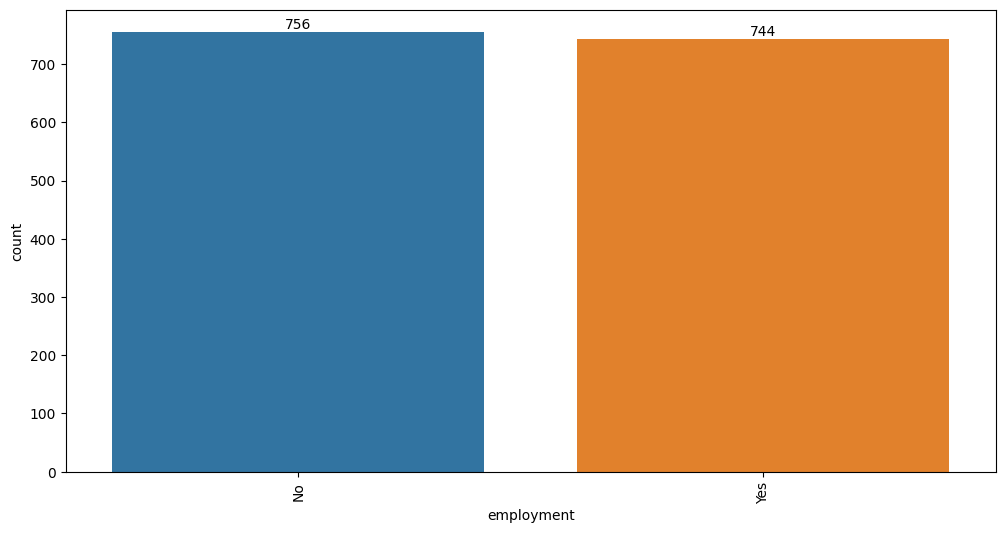

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `employment` >= `0.5`**

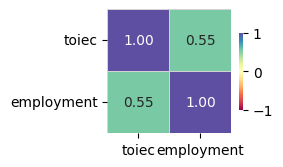

**Feature interaction between `toiec`/`employment` in `train_data`**

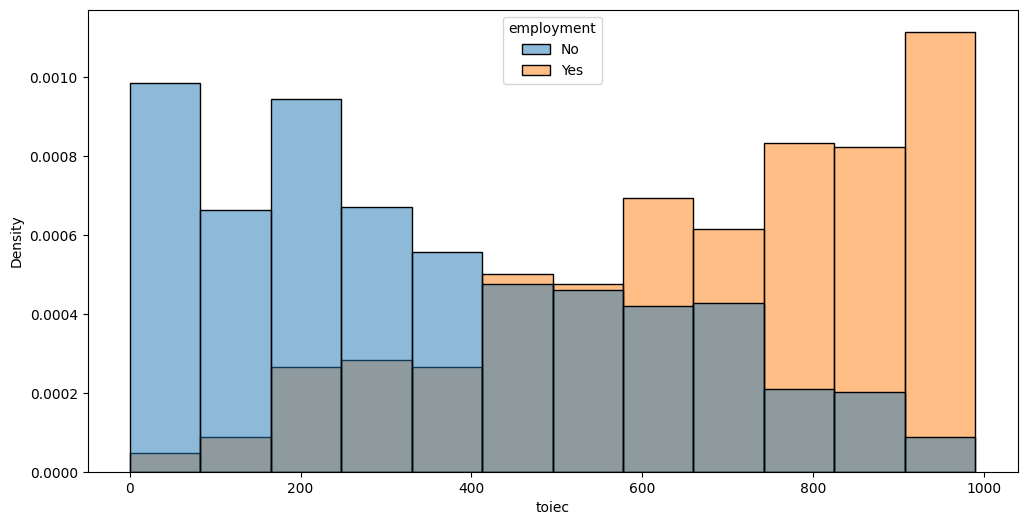

In [40]:
auto.target_analysis(
    train_data=df_train,
    label='employment',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_111117/"


### Model Prediction for employment

Using validation data for `Test` points

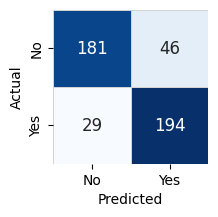

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.833333,0.87619,0.00083,0.001549,0.218086,0.00083,0.001549,0.218086,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
gpa,0.188889,0.015947,0.000006,5,0.221725,0.156053
toiec,0.185778,0.020882,0.000019,5,0.228774,0.142782
balance7,0.002667,0.003651,0.088904,5,0.010185,-0.004852
balance6,0.001778,0.009081,0.342087,5,0.020476,-0.016921
balance4,0.000889,0.005116,0.358714,5,0.011423,-0.009645
balance8,-0.001333,0.002534,0.847721,5,0.003884,-0.006550
balance0,-0.004444,0.003143,0.982945,5,0.002026,-0.010915
balance5,-0.005778,0.004332,0.979679,5,0.003142,-0.014697
balance1,-0.006222,0.003296,0.993267,5,0.000564,-0.013009
balance3,-0.006667,0.004157,0.988475,5,0.001893,-0.015227


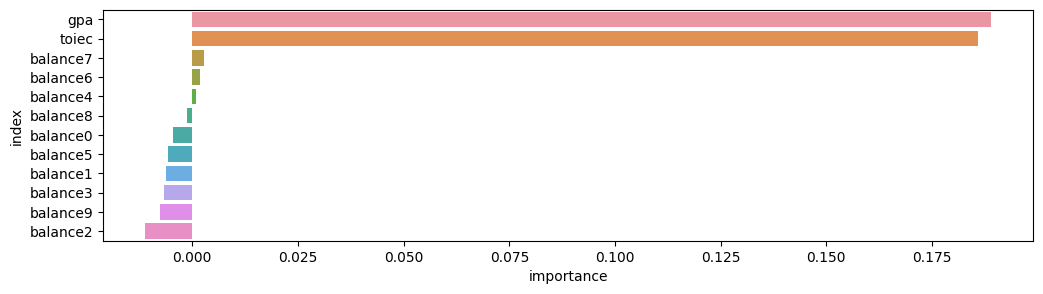

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
3031,410,2.34,True,True,False,False,False,True,True,True,True,True,Yes,0.670908,0.329092,0.341816
3562,420,2.23,False,True,True,True,True,True,False,False,False,True,Yes,0.629780,0.370220,0.259560
3521,560,3.82,False,False,False,True,False,False,True,True,True,False,No,0.381926,0.618074,0.236148
186,470,2.20,True,True,False,False,False,False,True,True,False,False,Yes,0.615211,0.384789,0.230421
137,615,1.45,True,False,True,False,True,True,False,False,False,False,Yes,0.610440,0.389560,0.220880
3149,855,2.23,False,True,True,True,True,False,True,True,True,True,No,0.390826,0.609174,0.218348
4637,940,1.85,False,False,False,True,True,False,True,False,False,True,No,0.419480,0.580520,0.161039
4517,155,3.73,False,False,False,True,True,False,False,True,True,True,Yes,0.577100,0.422900,0.154201
1449,965,2.01,False,True,True,True,True,True,True,False,False,False,No,0.434479,0.565521,0.131042
2106,230,2.65,True,False,False,False,True,False,False,True,True,False,Yes,0.564785,0.435215,0.129570


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,toiec,gpa,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9,employment,No,Yes,error
3776,990,1.30,True,True,True,False,False,False,False,False,True,True,Yes,0.500001,0.499999,0.000001
3507,855,1.86,False,True,False,False,False,False,False,True,False,True,No,0.499844,0.500156,0.000311
2553,80,4.36,True,True,True,False,False,True,True,True,True,True,No,0.499721,0.500279,0.000558
249,840,1.95,True,True,False,True,False,False,True,True,False,False,Yes,0.501248,0.498752,0.002496
2987,140,4.08,True,False,True,True,False,True,False,False,True,True,No,0.497140,0.502860,0.005720
4232,15,3.78,False,True,True,True,True,True,True,False,False,False,Yes,0.502909,0.497091,0.005819
872,875,1.29,False,False,False,True,True,False,True,True,False,False,Yes,0.503659,0.496341,0.007318
3696,30,4.31,False,False,True,True,True,False,False,False,True,False,No,0.495588,0.504412,0.008823
2568,565,2.36,False,True,False,False,False,False,False,False,True,True,Yes,0.505832,0.494168,0.011664
2681,660,2.28,False,True,False,False,False,True,False,True,False,True,No,0.494135,0.505865,0.011729


In [42]:
auto.quick_fit(
    train_data= df_train,
    label = 'employment',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석 

`-` 0번관측치 

In [43]:
df_train.iloc[[0]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,195,2.5,No,True,False,False,False,True,False,True,False,False,False


In [44]:
predictr.predict(df_train.iloc[[0]])

4431    No
Name: employment, dtype: object

In [48]:
predictr.predict_proba(df_train.iloc[[0]])

,No,Yes
4431,0.814248,0.185752


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
4431,195,2.5,No,1,0,0,0,1,0,1,0,0,0


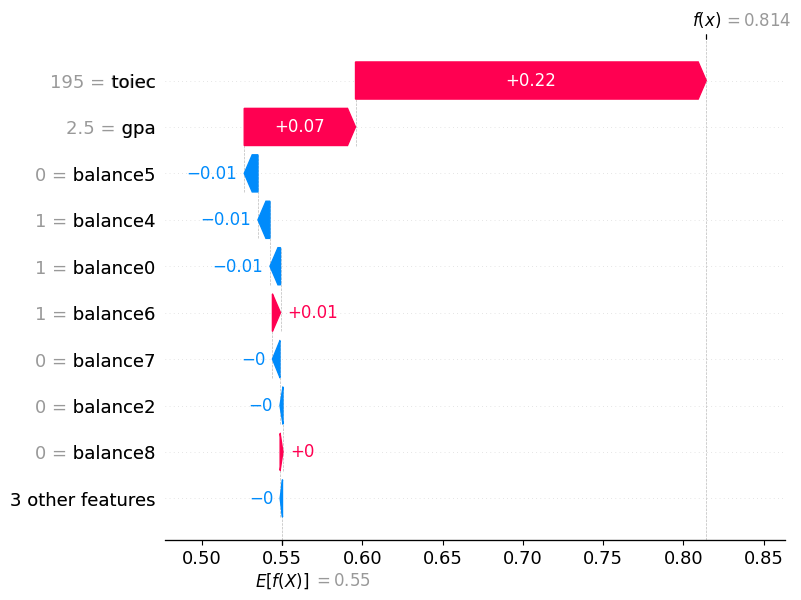

In [47]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]]*1,
    display_rows=True,
    plot='waterfall'
)

In [55]:
# 떨어진 이유

`-` 1번관측치 

In [49]:
df_train.iloc[[1]]

,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
2162,410,3.74,Yes,True,False,True,True,False,True,False,False,False,False


In [50]:
predictr.predict(df_train.iloc[[1]])

2162    Yes
Name: employment, dtype: object

In [51]:
predictr.predict_proba(df_train.iloc[[1]])

,No,Yes
2162,0.347349,0.652651


,toiec,gpa,employment,balance0,balance1,balance2,balance3,balance4,balance5,balance6,balance7,balance8,balance9
2162,410,3.74,Yes,1,0,1,1,0,1,0,0,0,0


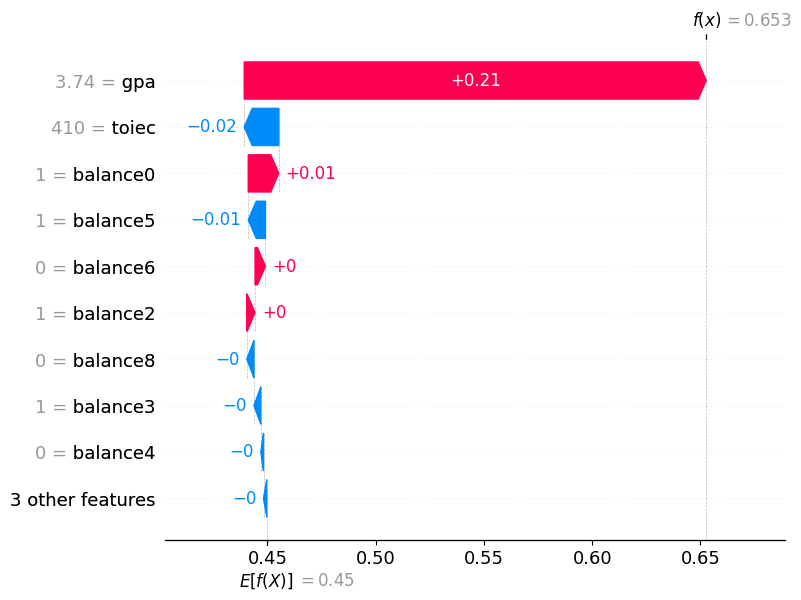

In [53]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]]*1,
    display_rows=True,
    plot='waterfall'
)

In [54]:
# 합격한이유